Filter Methods: Definition
Filter methods select features from a dataset independently for any machine learning algorithm. These methods rely only on the characteristics of these variables, so features are filtered out of the data before learning begins.
These methods are powerful and simple and help to quickly remove features— and they are generally the first step in any feature selection pipeline.

Filter Methods: Advantages
Selected features can be used in any machine learning algorithm,
They’re computationally inexpensive—you can process thousands of features in a matter of seconds.
Filter methods are very good for eliminating irrelevant, redundant, constant, duplicated, and correlated features.

Filter Methods: Types
There are two types of filter methods: Univariate and Multivariate.
Univariate filter methods evaluate and rank a single feature according to certain criteria.

They treat each feature individually and independently of the feature space. This is how it functions in practice:
It ranks features according to certain criteria.
Then select the highest ranking features according to those criteria.
One problem that can occur with univariate methods is they may select a redundant variable, as they don’t take into consideration the relationship between features.
Multivariate filter methods, on the other hand, evaluate the entire feature space. They take into account features in relation to other ones in the dataset.
These methods are able to handle duplicated, redundant, and correlated features.

The Methods
In recent years, numerous methods and techniques have been proposed for univariate and multivariate filter-based feature selection. In the remainder of this article, we’ll explore the following methods in-depth, along with some code:
Basic Filter Methods
Correlation Filter Methods
Statistical & Ranking Filter Methods

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/housing.csv')

In [3]:
data.shape

(1460, 63)

# Constant Features

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['SalePrice'], axis=1), 
                                                    data.SalePrice, test_size=0.3, 
                                                    random_state=0)

In [5]:
numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]

In [6]:
from sklearn.feature_selection import VarianceThreshold
vs_constant = VarianceThreshold(threshold=0)

In [7]:
vs_constant.fit(numerical_x_train)

VarianceThreshold(threshold=0)

In [8]:
len(x_train[x_train.select_dtypes([np.number]).columns].columns[vs_constant.get_support()])

35

In [9]:
constant_columns = [column for column in numerical_x_train.columns
                    if column not in numerical_x_train.columns[vs_constant.get_support()]]

In [10]:
len(constant_columns)

0

In [11]:
constant_cat_columns = [column for column in x_train.columns 
                        if (x_train[column].dtype == "O" and len(x_train[column].unique())  == 1 )]

In [12]:
all_constant_columns = constant_cat_columns + constant_columns

In [13]:
x_train.drop(labels=constant_columns, axis=1, inplace=True)
x_test.drop(labels=constant_columns, axis=1, inplace=True)

# Quasi Constant features

In [14]:
threshold = 0.98

# create empty list
quasi_constant_feature = []

# loop over all the columns
for feature in x_train.columns:

    # calculate the ratio.
    predominant = (x_train[feature].value_counts() / np.float(len(x_train))).sort_values(ascending=False).values[0]
    
    # append the column name if it is bigger than the threshold
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   
        
print(quasi_constant_feature)

['Street', 'Utilities', 'Condition2', 'LowQualFinSF', '3SsnPorch', 'PoolArea']


In [15]:
# drop the quasi constant columns
x_train.drop(labels=quasi_constant_feature, axis=1, inplace=True)
x_test.drop(labels=quasi_constant_feature, axis=1, inplace=True)

# Duplicated Features

In [16]:
train_features_T = x_train.T
train_features_T.head()

,64,682,960,1384,1100,416,1034,853,472,1011,...,1094,599,277,1033,1383,763,835,1216,559,684
Id,65,683,961,1385,1101,417,1035,854,473,1012,...,1095,600,278,1034,1384,764,836,1217,560,685
MSSubClass,60,120,20,50,30,60,30,80,180,90,...,20,160,20,20,30,60,20,90,120,60
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RM,RL,RL,RL,RL,RL,RM,RL,RL
LotFrontage,70.05,70.05,50,60,60,74,50,70.05,35,75,...,74,24,140,70.05,70.05,82,60,68,70.05,58
LotArea,9375,2887,7207,9060,8400,7844,6305,12095,3675,9825,...,5868,1950,19138,8125,25339,9430,9600,8930,3196,16770


In [17]:
print(train_features_T.duplicated().sum())

0


In [18]:
duplicated_columns = train_features_T[train_features_T.duplicated()].index.values

In [19]:
x_train.drop(labels=duplicated_columns, axis=1, inplace=True)
x_test.drop(labels=duplicated_columns, axis=1, inplace=True)

# Correlation methods

In [20]:
correlated_features = set()
correlation_matrix = x_train.corr()

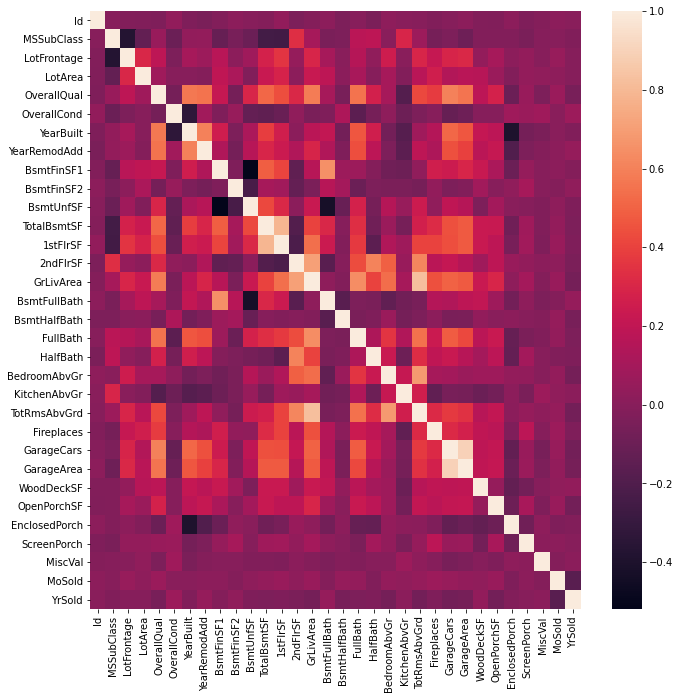

In [21]:
plt.figure(figsize=(11,11))
sns.heatmap(correlation_matrix)

In [22]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [23]:
correlated_features

{'GarageArea', 'TotRmsAbvGrd'}

In [24]:
x_train.drop(labels=correlated_features, axis=1, inplace=True)
x_test.drop(labels=correlated_features, axis=1, inplace=True)

# Statistical Measures

In [25]:
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

### Mutual Information

In [26]:
# select the number of features you want to retain.
select_k = 10

# get only the numerical features.
numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]


# create the SelectKBest with the mutual info strategy.
selection = SelectKBest(mutual_info_classif, k=select_k).fit(numerical_x_train, y_train)

# display the retained features.
features = x_train.columns[selection.get_support()]
print(features)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 54 but corresponding boolean dimension is 30

In [ ]:
mutual_info(x_train, y_train)

### Chi Squared Score

In [27]:
# change this to how much features you want to keep from the top ones.
select_k = 10

# apply the chi2 score on the data and target (target should be binary).  
selection = SelectKBest(chi2, k=select_k).fit(x_train, y_train)

# display the k selected features.
features = x_train.columns[selection.get_support()]
print(features)

ValueError: could not convert string to float: 'RL'

### Univariate RMSE

In [ ]:
def univariate_rmse():
    mse_values = []
    for feature in x_train.columns:
        clf = DecisionTreeRegressor()
        clf.fit(x_train[feature].to_frame(), y_train)
        y_scored = clf.predict(x_test[feature].to_frame())
        mse_values.append(mean_squared_error(y_test, y_scored))
    mse_values = pd.Series(mse_values)
    mse_values.index = x_train.columns
    print(mse_values.sort_values(ascending=False))
    print(len(mse_values[mse_values > threshold]),'out of the %s featues are kept'% len(x_train.columns))
    keep_col = mse_values[mse_values > threshold]
    return keep_col   

In [ ]:
univariate_rmse()

### Univariate ROC-AUC

In [ ]:
def univariate_roc_auc():
    roc_values = []
    for feature in x_train.columns:
        clf = DecisionTreeClassifier()
        clf.fit(x_train[feature].to_frame(), y_train)
        y_scored = clf.predict_proba(x_test[feature].to_frame())
        roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    roc_values = pd.Series(roc_values)
    roc_values.index = X_train.columns
    print(roc_values.sort_values(ascending=False))
    print(len(roc_values[roc_values > threshold]),'out of the %s featues are kept'% len(X_train.columns))
    keep_col = roc_values[roc_values > threshold]
    return keep_col

In [ ]:
# use it for a classification task.
# univariate_roc_auc()